put description here later
"SpARCS-0035_totalall_Ks_1.obs_sed" look like, Columns:  lambda   flux_cat  err_cat   err_full tempa_z  

"compilation_SpARCS-0035.dat" looks like: PHOTCATID spec_z source(1=GOGREEN,2=GCLASS,3=SPT,4=FORS2,5=VIPERS,6=PRIMUS,7=SDSS,8=NED) quality distance/arcsec altspec_z altdistance/arcsec altsource altquality GOGREENSPECID

DONT FORGET THAT ZSPEC HAS DIFFERENT DIMENSIONS THAT THE REST

In [67]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii

#To read in files with flux and template flux: each file is one galaxy, currently reads in the SpARCS0035 cluster, can modify for others
fluxpath = r'''C:\Users\Anna\PHOTOMETRY\BESTFIT_SEDs\EAZY\for_greg'''
#fluxpath = '/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/BESTFIT_SEDs/EAZY/for_greg/'
#Example file name: SpARCS-0035_totalall_Ks_1.obs_sed  - number varies from 1-4889 for SpARCS-0035
flux_dat_all = {} #initialize empty dictionary, not sure I still need this

#To read in spectroscopic redshift:
redpath = r'''C:\Users\Anna\PHOTOMETRY\SPECZ_MATCHED'''
#redpath = '/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/SPECZ_MATCHED/'
filename = redpath + "\compilation_SpARCS-0035.dat" 
red_dat = ascii.read(filename)
#print(red_dat[4881]['spec_z']) #prints redshift for galaxy 4881, but still is an ascii table

#To read in parameters for galaxies
parapath = r'''C:\Users\Anna\Learning-Python-master\SpARCS-0035_totalall_HAWKIKs.cat'''
para_dat = ascii.read(parapath)
#parameters
good_flux = 10**0.8 #good_flux corresponds to k band mag < 23
#Parameters for good photometry, redshift, and flux
izspec = np.where((red_dat['spec_z'] > 0) & (para_dat['totmask'] == 0) & (para_dat['K_flag'] == 0) & (para_dat['HAWKIKs'] > good_flux))
izspec = izspec[0]
#print(izspec) #prints indices of good galaxies, pretty sure its a np array of ints
#Change to strings:
indices = str(izspec) #strings now?? - no, being weird for some reason


[ 480 1193 1197 1200 1202 1237 1248 1295 1332 1341 1363 1396 1438 1449
 1476 1499 1523 1561 1568 1572 1588 1618 1625 1638 1657 1698 1700 1701
 1719 1732 1739 1790 1825 1830 1843 1883 1898 1900 1932 1942 1965 1995
 2009 2028 2031 2035 2039 2068 2069 2089 2105 2120 2127 2133 2176 2181
 2185 2199 2201 2210 2226 2246 2275 2314 2319 2323 2338 2344 2380 2393
 2420 2461 2515 2520 2549 2552 2582 2591 2621 2650 2672 2723 2732 2739
 2767 2817 2820 2832 2849 2859 2901 2911 2913 2929 2935 2952 2961 3021
 3032 3050 3064 3115 3137 3152 3262 3270 3379 3407 3430 3481 3485 3494
 3518 3536 3545 3547 3548 3593 3611 3614 3629 3638 3641 3688 3691 3706
 3746 3754 3765 3801 3808 3821 3829 3902 3974 4002 4007 4017 4048 4243
 4256 4257 4301 4430 4435 4444 4446 4449 4468 4530 4542 4553 4590 4635
 4659 4689 4774 4793 4811 4824 4884]


In [82]:
#Now in a loop, read in the sparcs files because theres a bunch, and while at it, add the zspec from the red_dat table
#for n in range(1, 4889): #don't do this, there are missing #'s '
for galaxy in izspec:
    #name = "\SpARCS-0035_totalall_Ks_" + str(n) + ".obs_sed" #Should build the file name from path to file name
    name = "\SpARCS-0035_totalall_Ks_" + str(galaxy) + ".obs_sed" #Should build the file name from path to file name
    imstr = fluxpath + name
    flux_dat = ascii.read(imstr) #will overwrite each time
    #Now we need to convert the ascii table to a numpy array so we can do numpy things to it
    flux_dat_all[str(galaxy)] = {} #initialize
    #Now here's all the columns:
    flux_dat_all[str(galaxy)]['lambda'] = np.array(flux_dat['lambda'])
    flux_dat_all[str(galaxy)]['flux_cat'] = np.array(flux_dat['flux_cat'])
    flux_dat_all[str(galaxy)]['err_cat'] = np.array(flux_dat['err_cat'])
    flux_dat_all[str(galaxy)]['err_full'] = np.array(flux_dat['err_full'])
    flux_dat_all[str(galaxy)]['tempa_z'] = np.array(flux_dat['tempa_z'])
    flux_dat_all[str(galaxy)]['tempa_zprior'] = np.array(flux_dat['tempa_zprior'])
    #To append flux_dat_all with redshifts from the above file:
    flux_dat_all[str(galaxy)]['zspec'] = np.array(red_dat[galaxy]['spec_z']) #unlike others, need to specify which galaxy with [n] because red_dat has all in one file

#print(flux_dat_all) #prints all info all galaxies
#print(flux_dat_all['4884']) #prints one galaxy, all columns
#print(flux_dat_all['4884']['lambda']) #prints one galaxy, just lambdas
#print(flux_dat_all['4884']['lambda'][0]) #prints one galaxy, just first(0th) lambda (which is currently the k band)
#print(flux_dat_all['4884']['zspec']) #prints one galaxy's zspec



0.06295744425092129


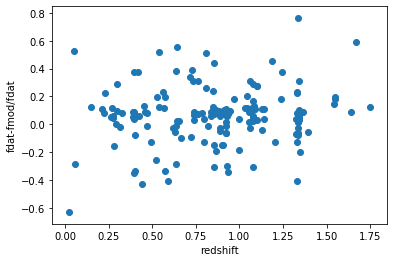

In [95]:
#Now I want to make a plot of residual flux versus redshift for cluster SpARCS-0035, in the K band
#First I will make an array of just the k band fluxes (template and observed)

k_dat = []
redshift = []
k_mod = []
for galaxy in izspec:
    i = 0
    redshift.append(flux_dat_all[str(galaxy)]['zspec'])
    k_dat.append(flux_dat_all[str(galaxy)]['flux_cat'][0]) #0th should be the k band catalog flux
    k_mod.append(flux_dat_all[str(galaxy)]['tempa_zprior'][0]) #0th should be the k band template flux

    
#Make residuals: (fdat - fmod) / f_dat vs. zspec
x=redshift
fdat = np.array(k_dat)
fmod = np.array(k_mod)
y = (fdat - fmod)/fdat
plt.scatter(x,y)
plt.xlabel("Redshift")
plt.ylabel("fdat-fmod/fdat")

print(np.average(y))




